**Task 1: Iris Flower Classification**


In [1]:
# 📦 Import Libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [2]:
# 📥 Load the dataset

df = pd.read_csv("Iris.csv")
df.drop("Id", axis=1, inplace=True)

In [3]:
# 🔍 Quick Look

print("First 5 rows:\n", df.head())
print("\nDataset Info:")
print(df.info())
print("\nClass Distribution:")
print(df['Species'].value_counts())

First 5 rows:
    SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0            5.1           3.5            1.4           0.2  Iris-setosa
1            4.9           3.0            1.4           0.2  Iris-setosa
2            4.7           3.2            1.3           0.2  Iris-setosa
3            4.6           3.1            1.5           0.2  Iris-setosa
4            5.0           3.6            1.4           0.2  Iris-setosa

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None

Class Distribution:
Species
Iris-setosa        50
Iris-versico

In [4]:
# 🎯 Label Encoding

le = LabelEncoder()
df["Species"] = le.fit_transform(df["Species"])  # Setosa=0, Versicolor=1, Virginica=2

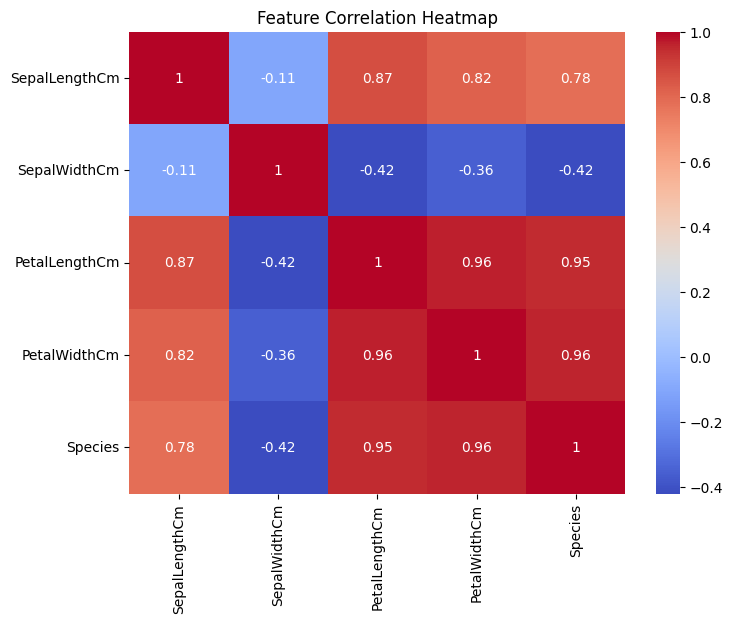

In [6]:
# 🔥 Correlation Heatmap

plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

In [7]:
# 🧪 Train-Test Split

X = df.drop("Species", axis=1)
y = df["Species"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
# 🤖 Model Training

models = {
    "Logistic Regression": LogisticRegression(max_iter=200),
    "Support Vector Classifier": SVC(probability=True),
    "K-Nearest Neighbors": KNeighborsClassifier()
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    results[name] = {
        "Accuracy": acc,
        "Confusion Matrix": cm,
        "Classification Report": report
    }

    print(f"\n📊 Results for {name}")
    print(f"Accuracy: {acc:.4f}")
    print("Confusion Matrix:\n", cm)
    print("Classification Report:\n", report)


📊 Results for Logistic Regression
Accuracy: 1.0000
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


📊 Results for Support Vector Classifier
Accuracy: 1.0000
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00

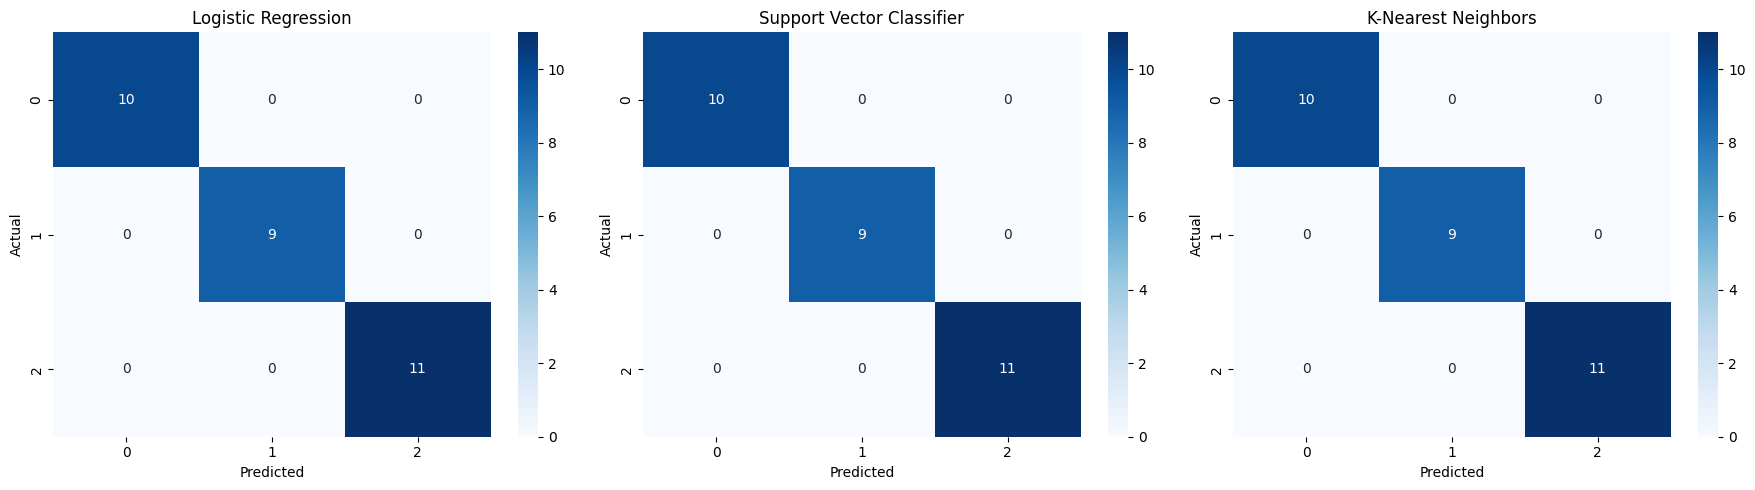

In [9]:
# 🖼️ Confusion Matrix Heatmaps

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for idx, (model_name, result) in enumerate(results.items()):
    sns.heatmap(result["Confusion Matrix"], annot=True, fmt="d", cmap="Blues", ax=axes[idx])
    axes[idx].set_title(f"{model_name}")
    axes[idx].set_xlabel("Predicted")
    axes[idx].set_ylabel("Actual")
plt.tight_layout()
plt.show()

In [10]:
# 🏆 Best Model Summary

best_model = max(results, key=lambda x: results[x]["Accuracy"])
print(f"\n✅ Best Performing Model: {best_model}")
print(f"Accuracy: {results[best_model]['Accuracy']:.4f}")


✅ Best Performing Model: Logistic Regression
Accuracy: 1.0000


**Task 2: Car Price Prediction with Machine Learning**

In [30]:
# ✅ Step 1: Import Required Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings("ignore")


In [31]:
# ✅ Step 2: Load the Dataset

df = pd.read_csv("car data.csv")
df.head()


,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [32]:
# ✅ Step 3: Basic Exploration

print("Shape of data:", df.shape)
df.info()
df.describe()


Shape of data: (301, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [33]:
# ✅ Step 4: Check for Missing Values

df.isnull().sum()


,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Driven_kms,0
Fuel_Type,0
Selling_type,0
Transmission,0
Owner,0


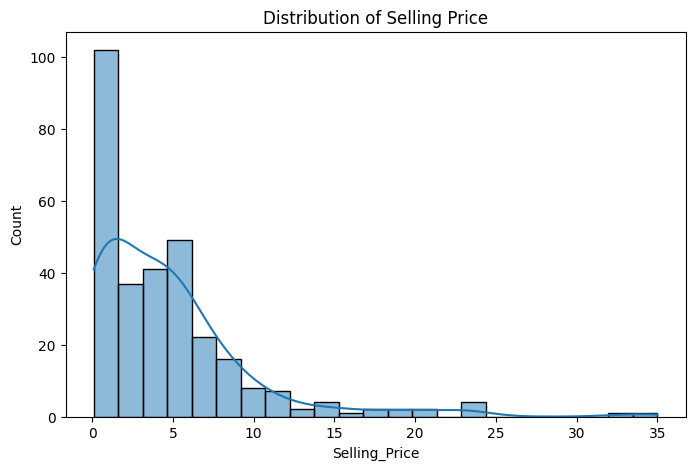

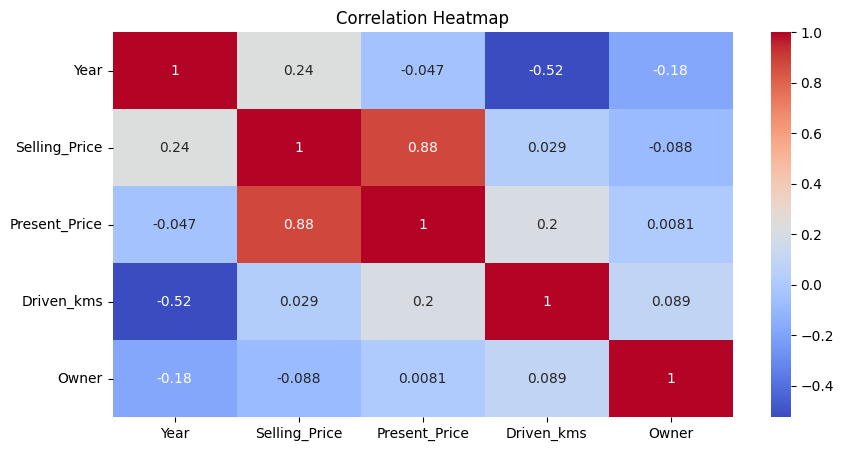

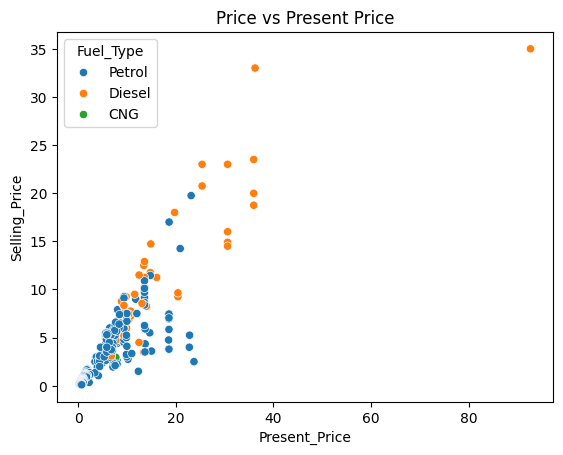

In [34]:
# ✅ Step 5: Visualizations

plt.figure(figsize=(8, 5))
sns.histplot(df['Selling_Price'], kde=True)
plt.title("Distribution of Selling Price")
plt.show()

plt.figure(figsize=(10, 5))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

sns.scatterplot(data=df, x='Present_Price', y='Selling_Price', hue='Fuel_Type')
plt.title("Price vs Present Price")
plt.show()


In [35]:
# ✅ Step 6: Feature Engineering

# Drop Car_Name as it's not useful
df = df.drop(['Car_Name'], axis=1)

# Rename 'Driven_kms' to 'Kms_Driven' for better clarity
df.rename(columns={"Driven_kms": "Kms_Driven"}, inplace=True)

# Encode categorical variables
df['Fuel_Type'] = LabelEncoder().fit_transform(df['Fuel_Type'])
df['Selling_type'] = LabelEncoder().fit_transform(df['Selling_type'])
df['Transmission'] = LabelEncoder().fit_transform(df['Transmission'])

df.head()


,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Selling_type,Transmission,Owner
0,2014,3.35,5.59,27000,2,0,1,0
1,2013,4.75,9.54,43000,1,0,1,0
2,2017,7.25,9.85,6900,2,0,1,0
3,2011,2.85,4.15,5200,2,0,1,0
4,2014,4.60,6.87,42450,1,0,1,0


In [36]:
# ✅ Step 7: Define Features and Target

X = df.drop('Selling_Price', axis=1)
y = df['Selling_Price']

# ✅ Step 8: Train-Test Split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ✅ Step 9: Feature Scaling

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [37]:
# ✅ Step 10: Train Multiple Models and Compare

models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42)
}

results = {}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    results[name] = {"RMSE": rmse, "R2 Score": r2}

results_df = pd.DataFrame(results).T
results_df


,RMSE,R2 Score
Linear Regression,1.87925,0.846690
Decision Tree,1.11332,0.946193
Random Forest,0.93124,0.962354


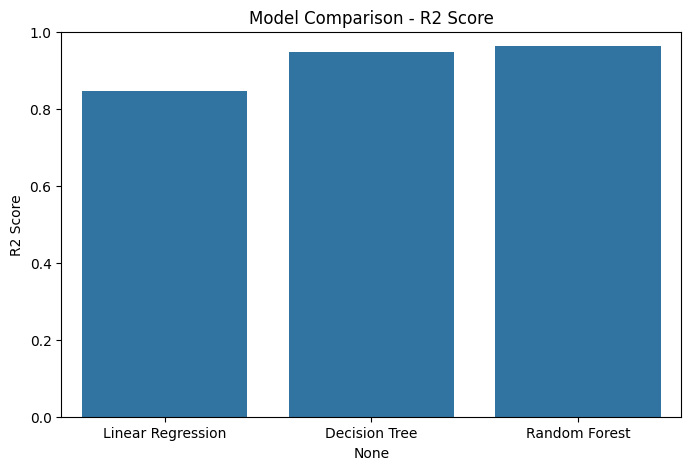

In [38]:
# ✅ Step 11: Visualize Performance

plt.figure(figsize=(8, 5))
sns.barplot(x=results_df.index, y=results_df["R2 Score"])
plt.title("Model Comparison - R2 Score")
plt.ylabel("R2 Score")
plt.ylim(0, 1)
plt.show()


In [39]:
# ✅ Step 12: Best Model

best_model = results_df['R2 Score'].idxmax()
print(f"🏆 Best Model: {best_model} with R2 Score = {results_df.loc[best_model, 'R2 Score']:.4f}")


🏆 Best Model: Random Forest with R2 Score = 0.9624


**Task 3: Sales Prediction using Python**

In [47]:
#📦 1. Import Required Libraries

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings("ignore")


In [54]:
#📥 2. Load and Explore Dataset

# Load the dataset
df = pd.read_csv("Advertising.csv")
# Show first 5 rows
df.head()
# Show dataset info
df.info()
# Check for missing values
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


,0
Unnamed: 0,0
TV,0
Radio,0
Newspaper,0
Sales,0


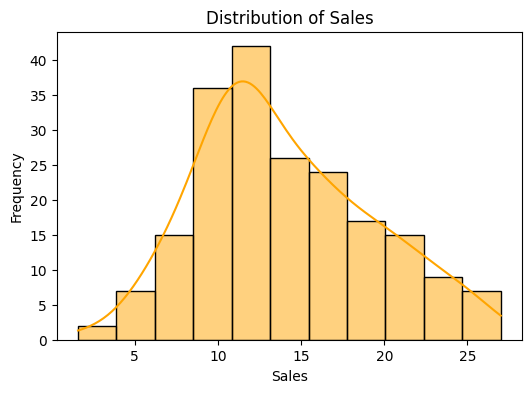

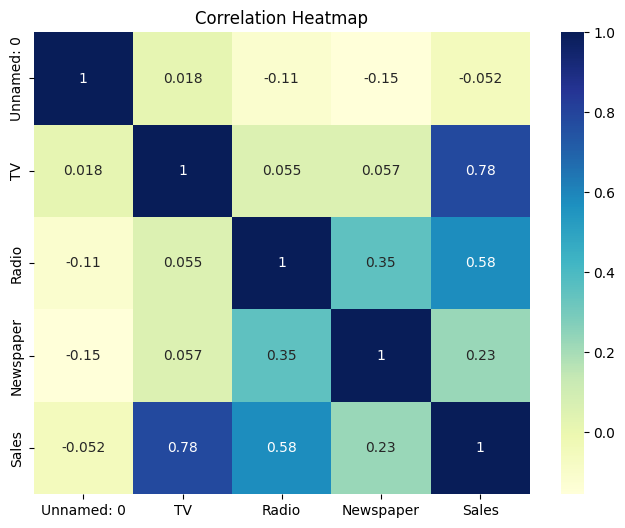

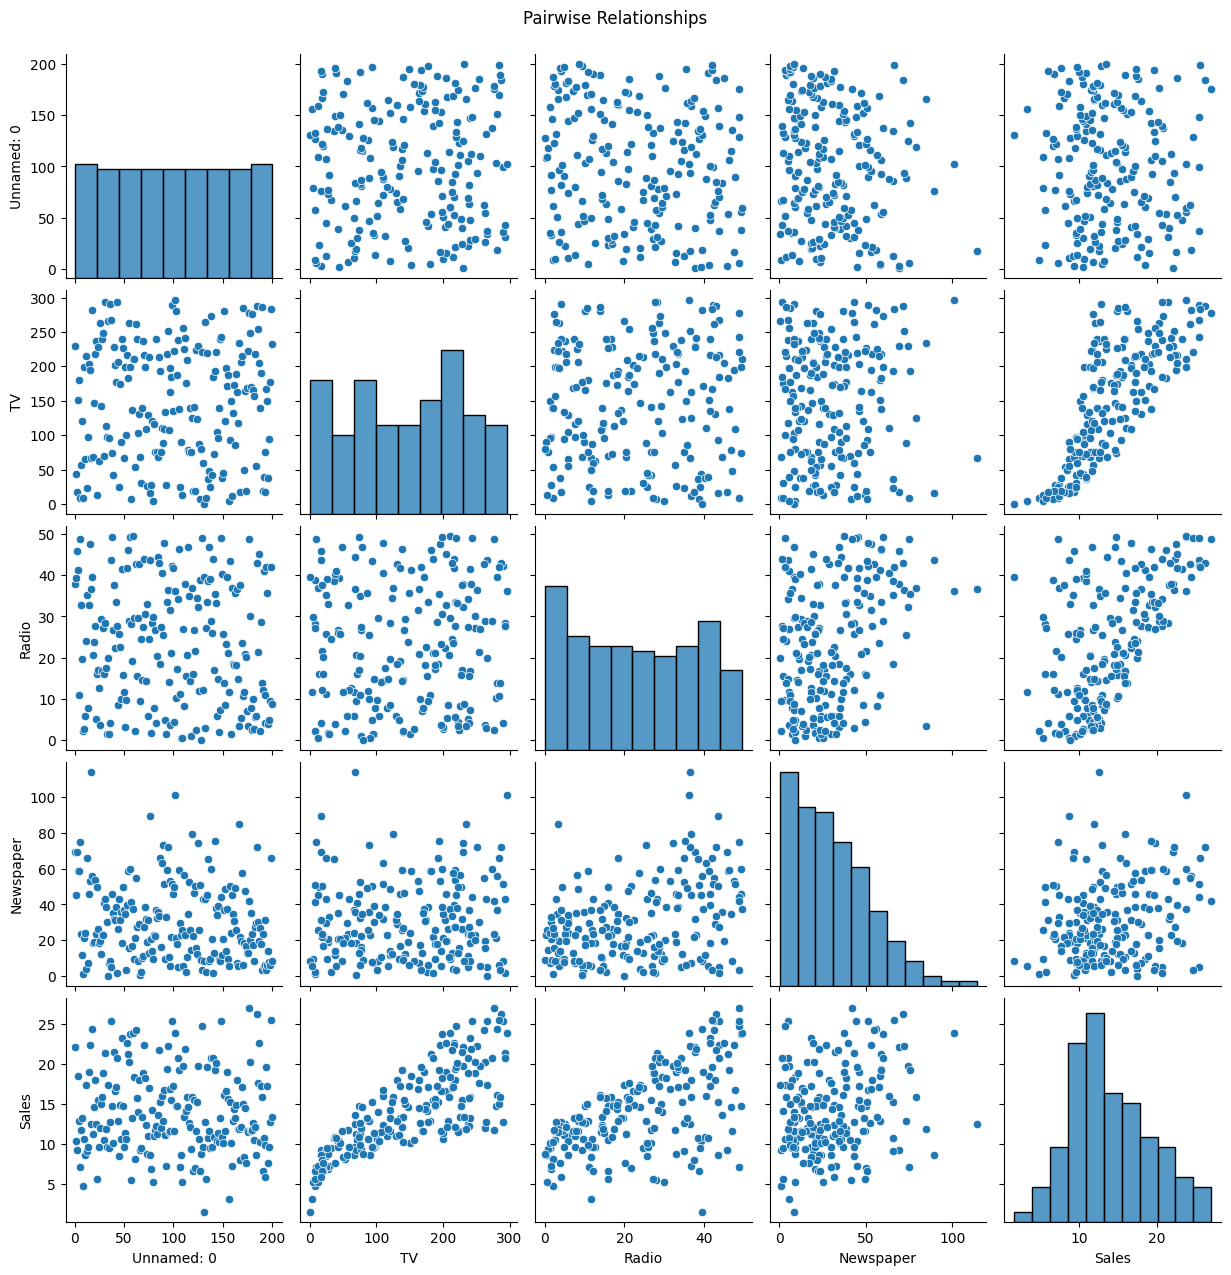

In [49]:
#📊 3. Exploratory Data Analysis (EDA)

# Statistical summary
df.describe()

# Distribution of Sales
plt.figure(figsize=(6, 4))
sns.histplot(df['Sales'], kde=True, color='orange')
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='YlGnBu')
plt.title('Correlation Heatmap')
plt.show()

# Pairplot of all variables
sns.pairplot(df)
plt.suptitle("Pairwise Relationships", y=1.02)
plt.show()

In [50]:
#🧹 4. Data Preprocessing

# Drop unnecessary index column if present
if 'Unnamed: 0' in df.columns:
    df.drop('Unnamed: 0', axis=1, inplace=True)

# Define features and target
X = df.drop('Sales', axis=1)
y = df['Sales']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [51]:
#🤖 5. Model Training - Linear Regression

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("Linear Regression:")
print("MSE:", mse_lr)
print("R2 Score:", r2_lr)

# Decision Tree Regressor
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print("Decision Tree Regressor:")
print("MSE:", mse_dt)
print("R2 Score:", r2_dt)

# Random Forest Regressor
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Regressor:")
print("MSE:", mse_rf)
print("R2 Score:", r2_rf)

Linear Regression:
MSE: 3.1740973539761033
R2 Score: 0.899438024100912
Decision Tree Regressor:
MSE: 2.175
R2 Score: 0.9310914968293178
Random Forest Regressor:
MSE: 0.5907322499999988
R2 Score: 0.9812843792541843


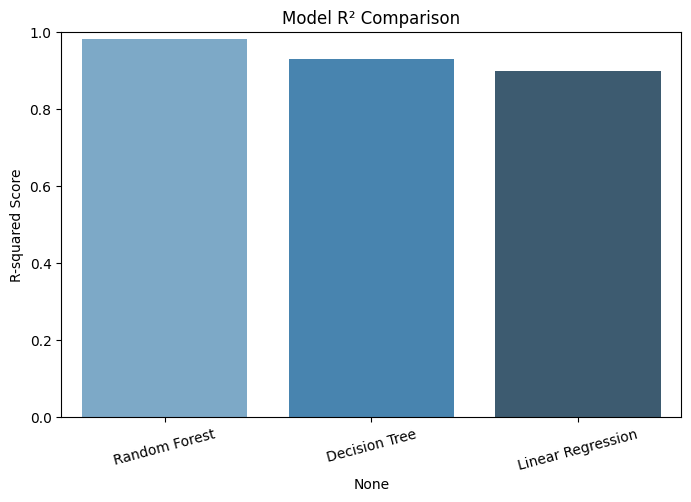

In [52]:
#📈 6. Model Comparison

# Compare all model results
results = {
    "Linear Regression": {"MSE": mse_lr, "R2": r2_lr},
    "Decision Tree": {"MSE": mse_dt, "R2": r2_dt},
    "Random Forest": {"MSE": mse_rf, "R2": r2_rf}
}

results_df = pd.DataFrame(results).T.sort_values(by="R2", ascending=False)
results_df

# Plot R2 comparison
plt.figure(figsize=(8, 5))
sns.barplot(x=results_df.index, y=results_df["R2"], palette="Blues_d")
plt.ylabel("R-squared Score")
plt.title("Model R² Comparison")
plt.ylim(0, 1)
plt.xticks(rotation=15)
plt.show()


In [53]:
#🏁 7. Final Conclusion

# Print the best model
best_model = results_df.idxmax()['R2']
print(f"✅ Best Model Based on R² Score: **{best_model}**")

✅ Best Model Based on R² Score: **Random Forest**
